This notebook is for preprocessing videos so that all of the images from the videos are in a directory.
The next notebook will then take the images and create a pix2pix dataset directory structure for the model.

This notebook:
- Extract frames from the video(s)
- Cut VIS and ICG from the frames
- Save the VIS and ICG

In [1]:
# Import stuff
from moviepy.editor import VideoFileClip
import numpy as np
import os
from datetime import timedelta
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [65]:
# Names/addresses of the video files
# vector of files names
video_vector = [
    "/blue/azarrinpar/ICG_AI/Videos/Carolyn Metz.mp4",
    # "/blue/azarrinpar/ICG_AI/Videos/Charlotte McElroy.mp4",
    ]

# HOLY SMOKES the border sizes are only valid for a single video. The different videos are of different sizes. Why. Why would you do this.

# asdf = "/blue/azarrinpar/ICG_AI/pytorch-CycleGAN-and-pix2pix/img_src/9-22/"

# Location of the image directory
image_dir = "/blue/azarrinpar/ICG_AI/pytorch-CycleGAN-and-pix2pix/img_src/9-23/"

vis_dir = os.path.join(image_dir, "vis")
icg_dir = os.path.join(image_dir, "icg")

# Make the directories if they don't exist
if not os.path.exists(vis_dir):
    os.makedirs(vis_dir)
if not os.path.exists(icg_dir):
    os.makedirs(icg_dir)

In [66]:
video_vector = [
    "/blue/azarrinpar/ICG_AI/Videos/Carolyn Metz.mp4",
    # "/blue/azarrinpar/ICG_AI/Videos/Charlotte McElroy.mp4",
    ]

# Trying out tqdm

# Loop

i = 0

# while len(video_vector) > 0:
for video in tqdm(video_vector, desc="Videos"):
    # Get the first video
    # video = video_vector.pop(0)
    # Load the video
    clip = VideoFileClip(video)
    # Get the frames
    frames = clip.iter_frames()
    # Get the frame rate
    fps = clip.fps
    for frame in tqdm(frames, desc="Frames"):
        # Read the frame
        # frame = cv2.imread(frame)
        # Cut the VIS and ICG from the image
        vis = frame[1 : 241, 0 : 320]
        icg = frame[241: 481, 0 : 320]
        # Write the VIS and ICG to the image directory under VIS and ICG directories
        # Format the index i to have 4 digits
        plt.imsave(os.path.join(vis_dir, f"{i:06}.png"), vis)
        plt.imsave(os.path.join(icg_dir, f"{i:06}.png"), icg)
        # cv2.imwrite(os.path.join(vis_dir, f"{i:06}.png"), vis)
        # cv2.imwrite(os.path.join(icg_dir, f"{i:06}.png"), icg)
        i += 1
        # if i > 500:
        #     break
# whilte vector is not empty
# int i = 0
# take the first file name from the vector
# for frame in frames
#   read the frame
#   cut the VIS and ICG from the image
#   write the VIS and ICG to the image directory under VIS and ICG directories

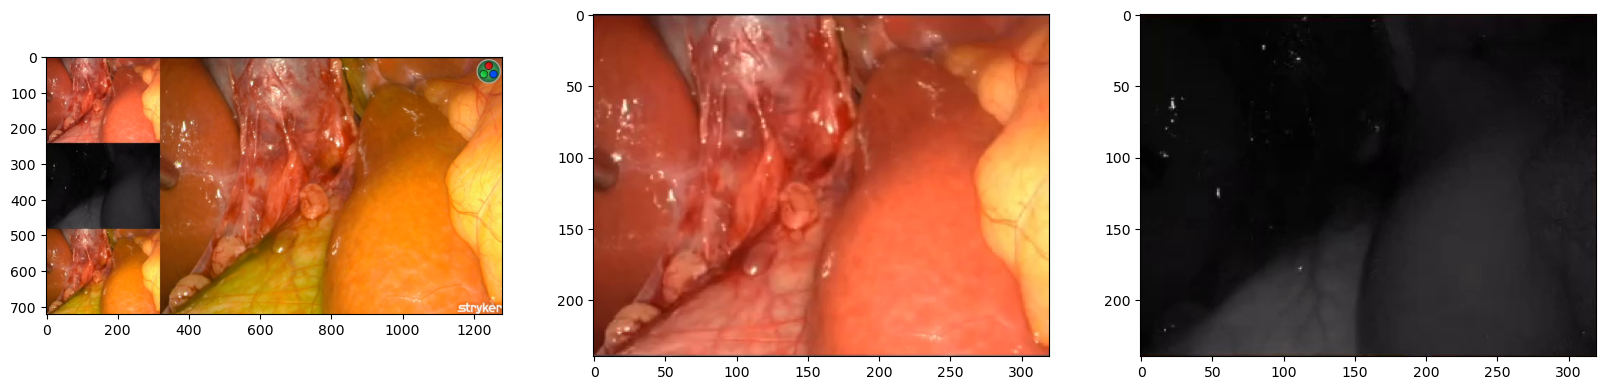

In [45]:
video = video_vector[0]
clip = VideoFileClip(video)
frames = clip.iter_frames()
frame = next(frames)

# display the first frame
import matplotlib.pyplot as plt
# show two images of frame
# use subplot to show two images
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(frame)
plt.subplot(1, 3, 2)
plt.imshow(frame[1 : 241, 0 : 320])
plt.subplot(1, 3, 3)
plt.imshow(frame[241 : 481, 0 : 320])

# save the first frame
# plt.imsave(os.path.join(vis_dir, "frame1.png"), frame)